[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/PyStat-ch-5-3.ipynb)

In [2]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ(ワーニングが出ることもあります)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['5-1-1-beer.csv'].decode('utf-8')), header=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Saving 5-1-1-beer.csv to 5-1-1-beer.csv


In [3]:
beer = pd.read_csv("5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


In [4]:
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]

# データフレームにまとめる
weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


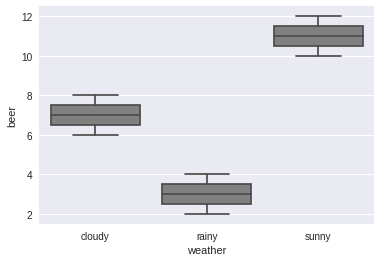

In [5]:
sns.boxplot(x = "weather",y = "beer",
            data = weather_beer, color='gray')

In [0]:
# データの読み込み
beer = pd.read_csv("5-1-1-beer.csv")

# モデルの推定
lm_model = smf.ols(formula = "beer ~ temperature", 
                   data = beer).fit()

In [0]:
df_lm_model = 1  # モデルの自由度
df_lm_resid = 28 # 残差の自由度

In [8]:
# 当てはめ値
lm_effect = lm_model.fittedvalues
# 残差
lm_resid = lm_model.resid
# 気温の持つ効果の大きさ
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model
# 残差の大きさ
squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F比
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.447

In [9]:
# 分散分析表
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [10]:
# モデルのsumamry
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 09 May 2018   Prob (F-statistic):           1.11e-05
Time:                        01:50:58   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""